In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import PIL
import numpy as np

In [2]:
## path for train, test, validation set

train_dir = r'C:\Users\ThireshSidda\Tensorflow_Tut\Pneumonia\chest_xray\train'
val_dir = r'C:\Users\ThireshSidda\Tensorflow_Tut\Pneumonia\chest_xray\val'
test_dir = r'C:\Users\ThireshSidda\Tensorflow_Tut\Pneumonia\chest_xray\test'

1762 1430


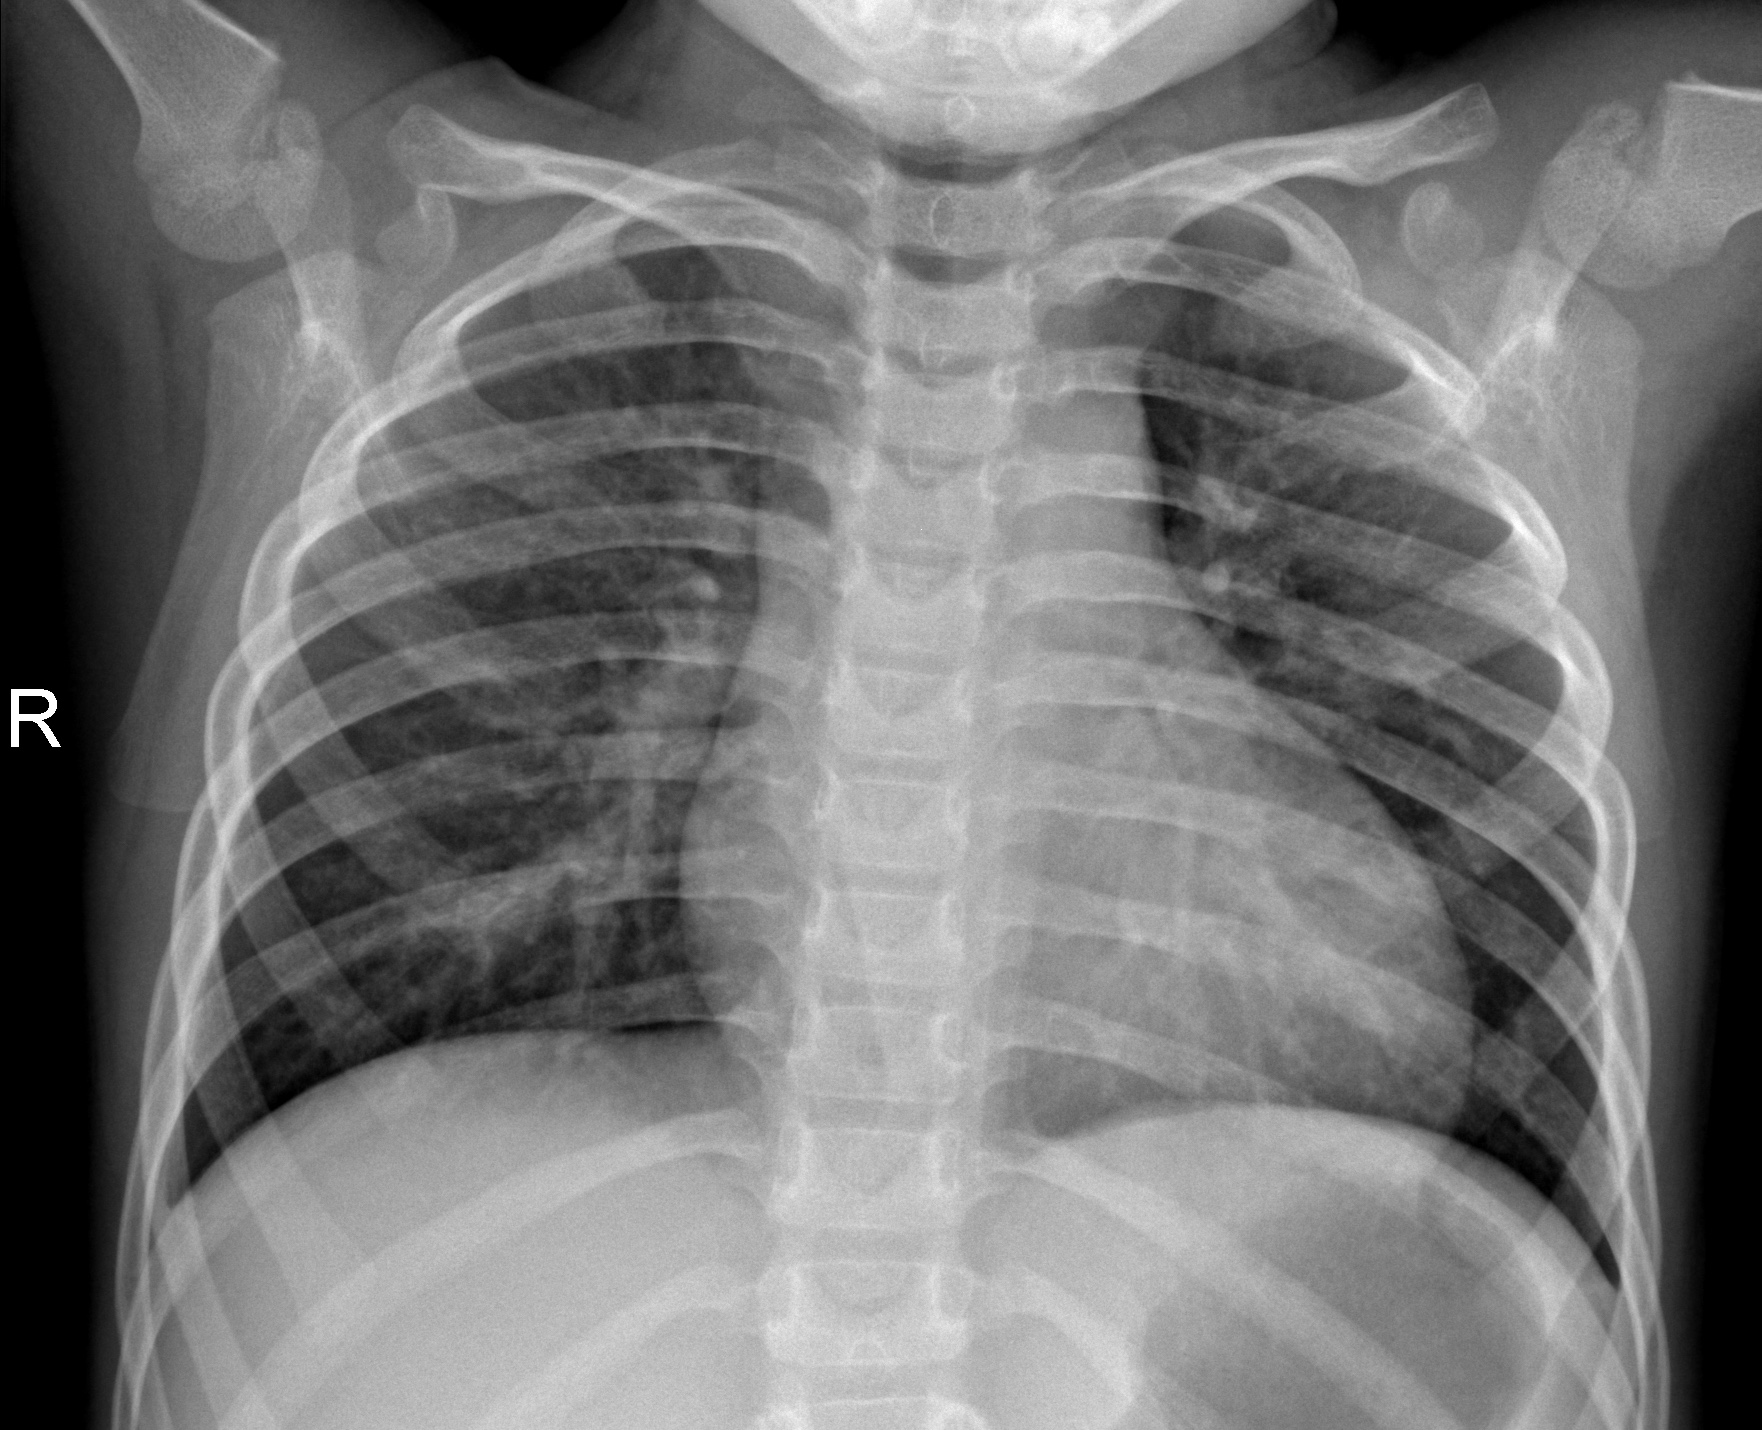

In [3]:
# train image
train_img = PIL.Image.open(r"C:\Users\ThireshSidda\Tensorflow_Tut\Pneumonia\chest_xray\train\NORMAL\IM-0162-0001.jpeg")
width, height = train_img.size
print(width, height)
train_img

In [4]:
classes = ['NORMAL', 'PNEUMONIA']

In [5]:
## Preprocessing

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, dtype=tf.float32)
val_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, dtype=tf.float32)
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, dtype=tf.float32)

# path to read the images from directory
train_ds = train_gen.flow_from_directory(train_dir, 
                                    target_size=(128, 128), 
                                    class_mode= 'sparse',  # it will give us the labels as a single integer value
                                    batch_size=64, 
                                    shuffle=True,
                                    color_mode='grayscale', 
                                    classes=classes)

val_ds = val_gen.flow_from_directory(val_dir, 
                                    target_size=(128, 128), 
                                    class_mode='sparse',
                                    batch_size=64, 
                                    shuffle=False, 
                                    color_mode='grayscale',
                                    classes=classes)

test_ds = test_gen.flow_from_directory(test_dir, 
                                    target_size=(128, 128), 
                                    class_mode='sparse',
                                    batch_size=64, 
                                    shuffle=False, 
                                    color_mode='grayscale', 
                                    classes=classes)

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [6]:
train_batch = train_ds[50]
print(train_batch[1].shape)
print(train_batch[0].shape)

(64,)
(64, 128, 128, 1)


In [7]:
## plotting some images

def show(batch, pred_labels=None):
    plt.figure(figsize=(10, 10))
    for i in range(16):
        plt.subplot(4, 4, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(batch[0][i], cmap='gray')
        lbl = classes[int(batch[1][i])]
        
        if pred_labels is not None:
            lbl += 'Pred/' + classes[int(batch[1][i])]

        plt.xlabel(lbl)

    plt.show()

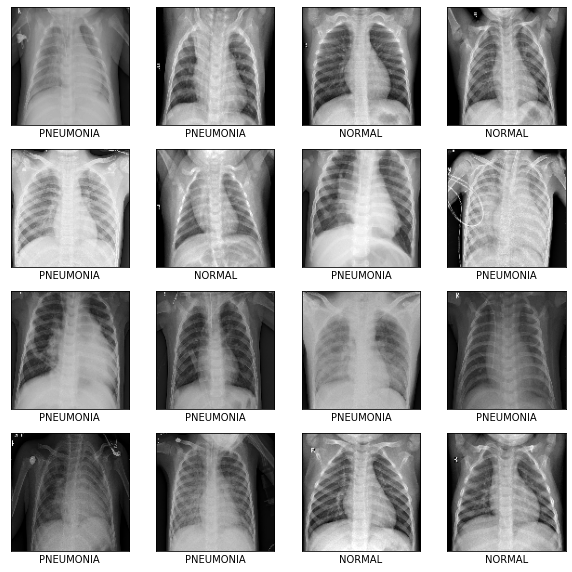

In [8]:
show(train_batch)

In [12]:
## model creation

model = tf.keras.models.Sequential()
# model.add(keras.layers.InputLayer(input_shape=(256, 256, 1)))
model.add(keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu', input_shape=(128, 128, 1)))# 32 x 64 x 64
model.add(keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')) # 64, 32, 32
model.add(keras.layers.MaxPool2D((2)))  # 64, 16, 16
model.add(keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))  # 64 x 8 x 8 
model.add(keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu'))  # 64 x 8 x 8 
model.add(keras.layers.MaxPool2D((2)))  # 64 x 4 x 4
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [13]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 64, 64, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [14]:
loss = keras.losses.BinaryCrossentropy(from_logits=False)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

In [15]:
## training 

epochs = 10

history = model.fit(train_ds, validation_data=val_ds, epochs=epochs, verbose=1)

Epoch 1/10
82/82 [==============================] - 189s 2s/step - loss: 0.5671 - accuracy: 0.7382 - val_loss: 0.6047 - val_accuracy: 0.7500
Epoch 2/10
82/82 [==============================] - 161s 2s/step - loss: 0.2181 - accuracy: 0.9126 - val_loss: 0.6021 - val_accuracy: 0.7500
Epoch 3/10
82/82 [==============================] - 230s 3s/step - loss: 0.1315 - accuracy: 0.9491 - val_loss: 0.3465 - val_accuracy: 0.8125
Epoch 4/10
82/82 [==============================] - 170s 2s/step - loss: 0.1169 - accuracy: 0.9579 - val_loss: 0.7235 - val_accuracy: 0.6250
Epoch 5/10
82/82 [==============================] - 153s 2s/step - loss: 0.0870 - accuracy: 0.9662 - val_loss: 0.3399 - val_accuracy: 0.8750
Epoch 6/10
82/82 [==============================] - 170s 2s/step - loss: 0.0734 - accuracy: 0.9736 - val_loss: 0.8554 - val_accuracy: 0.6250
Epoch 7/10
82/82 [==============================] - 151s 2s/step - loss: 0.0680 - accuracy: 0.9749 - val_loss: 0.3589 - val_accuracy: 0.8125
Epoch 8/10
82

In [16]:
def plot_loss(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    plt.plot(train_loss, '-rx', label='Train loss')
    plt.plot(val_loss, '-bx', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Epochs vs Loss')
    plt.legend()
    plt.show()

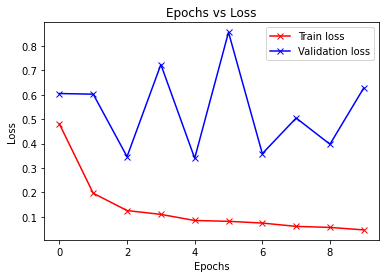

In [17]:
plot_loss(history)

In [18]:
def accuracy(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    plt.plot(train_acc, label='Train accuracy')
    plt.plot(val_acc, label='Val accuracy')
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.title("Epochs vs Accuracy")
    plt.legend()
    plt.show()

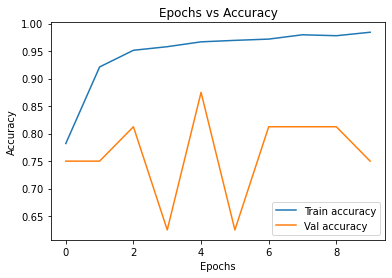

In [19]:
accuracy(history)

In [20]:
model.evaluate(test_ds, verbose=2)

10/10 - 15s - loss: 0.9998 - accuracy: 0.7788


[0.9997596740722656, 0.7788461446762085]

In [21]:
model.predict(test_ds)

array([[1.22217923e-01],
       [9.84322608e-01],
       [8.71561527e-01],
       [8.66117716e-01],
       [8.52564275e-02],
       [6.60099387e-02],
       [4.87307310e-02],
       [4.95863318e-01],
       [1.31073117e-01],
       [8.80308867e-01],
       [2.82216012e-01],
       [9.93554592e-01],
       [7.23778307e-02],
       [4.30899858e-02],
       [9.71033573e-01],
       [2.92743117e-01],
       [9.13664222e-01],
       [8.63497257e-01],
       [2.15983391e-03],
       [1.74594134e-01],
       [8.89511704e-01],
       [9.61628854e-02],
       [2.01880038e-01],
       [7.07283914e-02],
       [3.49695325e-01],
       [8.21799934e-02],
       [3.87700468e-01],
       [1.32792294e-02],
       [1.15168005e-01],
       [2.59866178e-01],
       [4.75526452e-01],
       [2.15822190e-01],
       [5.64299703e-01],
       [7.39200115e-02],
       [5.99679887e-01],
       [7.31938183e-02],
       [2.48268247e-03],
       [4.80073988e-02],
       [6.39116406e-01],
       [5.26866972e-01],
